In [45]:
import matplotlib.pyplot as plt
import pandas as pd
from tqdm.notebook import tqdm
tqdm.pandas()

In [41]:
!pip install mlxtend

In [42]:
# read csv file
df = pd.read_csv("D:\OneDrive - NITT\Custom_Download\Trial.csv")

<>:2: DeprecationWarning: invalid escape sequence \O
<>:2: DeprecationWarning: invalid escape sequence \O
C:\Users\avitr\AppData\Local\Temp\ipykernel_10040\485318110.py:2: DeprecationWarning: invalid escape sequence \O
  df = pd.read_csv("D:\OneDrive - NITT\Custom_Download\Trial.csv")
C:\Users\avitr\AppData\Local\Temp\ipykernel_10040\485318110.py:2: DtypeWarning: Columns (7,8,9,10) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("D:\OneDrive - NITT\Custom_Download\Trial.csv")


In [43]:
df

,smlt,asn,sd,t2m,skt,sp,msl,ssrd,strd,u10,v10,tp,tcc
0,tcc,v10,strd,tp,asn,sp,t2m,NaN,NaN,NaN,NaN,NaN,NaN
1,tcc,asn,v10,strd,tp,msl,t2m,NaN,NaN,NaN,NaN,NaN,NaN
2,asn,tcc,v10,strd,tp,msl,t2m,ssrd,NaN,NaN,NaN,NaN,NaN
3,tcc,v10,t2m,tp,asn,msl,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,tcc,v10,strd,tp,asn,msl,t2m,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
791731,sd,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
791732,sd,smlt,tp,asn,skt,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
791733,sd,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
791734,sd,smlt,tp,asn,skt,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [46]:
x = df[df.columns].progress_apply(
    lambda x: ','.join(x.dropna().astype(str)),
    axis=1
)

  0%|          | 0/791736 [00:00<?, ?it/s]

In [47]:
data = pd.DataFrame([])

In [48]:
data['Transaction'] = x

In [49]:
data.reset_index(inplace=True)

In [50]:
data.rename(columns={'index':'ID'},inplace=True)

In [51]:
data

,ID,Transaction
0,0,"tcc,v10,strd,tp,asn,sp,t2m"
1,1,"tcc,asn,v10,strd,tp,msl,t2m"
2,2,"asn,tcc,v10,strd,tp,msl,t2m,ssrd"
3,3,"tcc,v10,t2m,tp,asn,msl"
4,4,"tcc,v10,strd,tp,asn,msl,t2m"
...,...,...
791731,791731,sd
791732,791732,"sd,smlt,tp,asn,skt"
791733,791733,sd
791734,791734,"sd,smlt,tp,asn,skt"


In [52]:
import pandas as pd
import numpy as np
from mlxtend.frequent_patterns import association_rules, apriori
from mlxtend.preprocessing import TransactionEncoder

# get all the transcactions as a list
transcactions = list(data['Transaction'].apply(lambda x: sorted(x.split(','))))

# instantiate transcation encoder
encoder = TransactionEncoder().fit(transcactions)

onehot = encoder.transform(transcactions)

# convert one-hot encode data to DataFrame
onehot = pd.DataFrame(onehot, columns=encoder.columns_)
# compute frequent items using the Apriori algorithm - Get up to three items
frequent_itemsets = apriori(onehot, min_support = 0.001, max_len = 3, use_colnames=True)

# compute all association rules for frequent_itemsets
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)

In [53]:
rules['lhs items'] = rules['antecedents'].apply(lambda x:len(x) )
rules[rules['lhs items']>1].sort_values('lift', ascending=False).head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric,lhs items
666,"(skt, smlt)",(sd),0.009003,0.023341,0.002668,0.296296,12.694180,0.002457,1.387884,0.929593,2
698,"(smlt, t2m)",(sd),0.010670,0.023341,0.002668,0.250000,10.710714,0.002419,1.302212,0.916414,2
715,"(v10, sd)",(smlt),0.003334,0.172391,0.003334,1.000000,5.800774,0.002760,inf,0.830378,2
699,"(sd, t2m)",(smlt),0.003334,0.172391,0.002668,0.800000,4.640619,0.002093,4.138046,0.787136,2
707,"(tp, sd)",(smlt),0.008670,0.172391,0.006669,0.769231,4.462134,0.005174,3.586307,0.782677,2


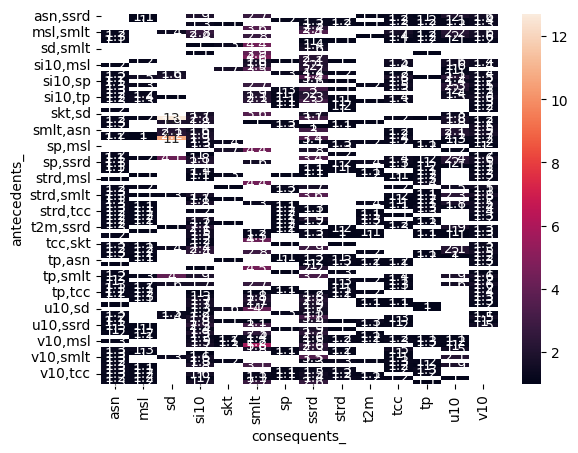

In [54]:
# Import seaborn under its standard alias
import seaborn as sns

# Replace frozen sets with strings
rules['antecedents_'] = rules['antecedents'].apply(lambda a: ','.join(list(a)))
rules['consequents_'] = rules['consequents'].apply(lambda a: ','.join(list(a)))

# Transform the DataFrame of rules into a matrix using the lift metric
pivot = rules[rules['lhs items']>1].pivot(index = 'antecedents_', 
                    columns = 'consequents_', values= 'lift')

# Generate a heatmap with annotations on and the colorbar off
sns.heatmap(pivot, annot = True)
plt.yticks(rotation=0)
plt.xticks(rotation=90)
plt.show()

In [55]:
data

,ID,Transaction
0,0,"tcc,v10,strd,tp,asn,sp,t2m"
1,1,"tcc,asn,v10,strd,tp,msl,t2m"
2,2,"asn,tcc,v10,strd,tp,msl,t2m,ssrd"
3,3,"tcc,v10,t2m,tp,asn,msl"
4,4,"tcc,v10,strd,tp,asn,msl,t2m"
...,...,...
791731,791731,sd
791732,791732,"sd,smlt,tp,asn,skt"
791733,791733,sd
791734,791734,"sd,smlt,tp,asn,skt"


In [56]:
df

,smlt,asn,sd,t2m,skt,sp,msl,ssrd,strd,u10,v10,tp,tcc
0,tcc,v10,strd,tp,asn,sp,t2m,NaN,NaN,NaN,NaN,NaN,NaN
1,tcc,asn,v10,strd,tp,msl,t2m,NaN,NaN,NaN,NaN,NaN,NaN
2,asn,tcc,v10,strd,tp,msl,t2m,ssrd,NaN,NaN,NaN,NaN,NaN
3,tcc,v10,t2m,tp,asn,msl,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,tcc,v10,strd,tp,asn,msl,t2m,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
791731,sd,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
791732,sd,smlt,tp,asn,skt,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
791733,sd,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
791734,sd,smlt,tp,asn,skt,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [59]:
np.array([i for i in df['smlt']])

array(['tcc', 'tcc', 'asn', ..., 'sd', 'sd', 'sd'], dtype='<U32')

In [62]:
type(df['smlt'])

pandas.core.series.Series

In [65]:
type(df[['smlt']])

pandas.core.frame.DataFrame